In [1]:
import pandas as pd
import numpy as np

# Данные

In [2]:
df = pd.read_csv('music_genre.csv')

In [3]:
target_class = 'mode'

In [4]:
df = df.loc[df['duration_ms'] != -1.0]
df = df.loc[df['tempo'] != '?']
df = df.dropna()
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


### Бесполезный столбец, удалим его

<Axes: >

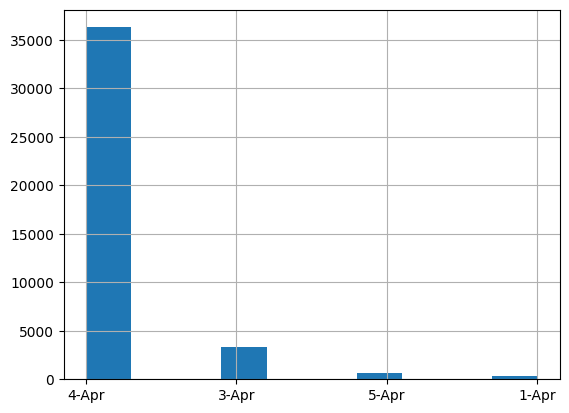

In [5]:
df['obtained_date'].hist()

In [6]:
del df['obtained_date']
del df['instance_id']
del df['duration_ms']
del df['track_name']

### Заменим текст на числа

In [7]:
def to_int(df_col):
    unique_keys = df_col.unique()
    unique_keys_dict = {key: i for i, key in enumerate(unique_keys)}
    return df_col.apply(lambda x: unique_keys_dict[x])

In [8]:
columns = ['key', 'mode', 'music_genre', 'artist_name']

In [9]:
for col in columns:
    df[col] = to_int(df[col])

In [10]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40560 entries, 1 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       40560 non-null  float64
 1   popularity        40560 non-null  float64
 2   acousticness      40560 non-null  float64
 3   danceability      40560 non-null  float64
 4   energy            40560 non-null  float64
 5   instrumentalness  40560 non-null  float64
 6   key               40560 non-null  float64
 7   liveness          40560 non-null  float64
 8   loudness          40560 non-null  float64
 9   mode              40560 non-null  float64
 10  speechiness       40560 non-null  float64
 11  tempo             40560 non-null  float64
 12  valence           40560 non-null  float64
 13  music_genre       40560 non-null  float64
dtypes: float64(14)
memory usage: 4.6 MB


In [11]:
df

,artist_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,0.0,31.0,0.01270,0.622,0.890,0.950000,0.0,0.124,-7.043,0.0,0.0300,115.002,0.531,0.0
2,1.0,28.0,0.00306,0.620,0.755,0.011800,1.0,0.534,-4.617,1.0,0.0345,127.994,0.333,0.0
3,2.0,34.0,0.02540,0.774,0.700,0.002530,2.0,0.157,-4.498,1.0,0.2390,128.014,0.270,0.0
4,3.0,32.0,0.00465,0.638,0.587,0.909000,3.0,0.157,-6.266,1.0,0.0413,145.036,0.323,0.0
6,4.0,46.0,0.02890,0.572,0.803,0.000008,4.0,0.106,-4.294,1.0,0.3510,149.995,0.230,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,3657.0,56.0,0.13300,0.849,0.660,0.000008,8.0,0.296,-7.195,1.0,0.0516,99.988,0.629,9.0
50001,3888.0,72.0,0.15700,0.709,0.362,0.000000,4.0,0.109,-9.814,1.0,0.0550,122.043,0.113,9.0
50002,3762.0,51.0,0.00597,0.693,0.763,0.000000,0.0,0.143,-5.443,1.0,0.1460,131.079,0.395,9.0
50003,4035.0,65.0,0.08310,0.782,0.472,0.000000,5.0,0.106,-5.016,0.0,0.0441,75.886,0.354,9.0


Разобъем на X, y

In [12]:
X = df.drop(target_class, axis=1)
y = df[target_class]

Нормируем

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Удобнее всего будет сделать двумерные вектора для визуализации 

In [14]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Метод K-средних

Метод заключается в том, чтобы минимизировать данную функцию

$$V = \sum_{i=1}^{k} \sum_{x \in S_i} (x - \langle x \rangle)^2$$

Реализацию данного метода возьмем из sklearn

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Предсказанное значение

C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sasha\AppData\Local\Temp\ipykernel_2244\3449300881.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


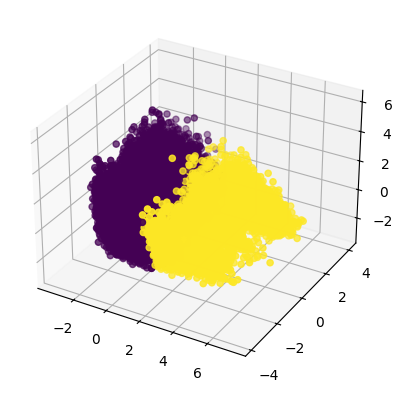

In [17]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=2)
y_pred_pca = kmeans_pca.fit_predict(X_pca)

# Визуализация результатов
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_pca, cmap='viridis')
fig.show()

Реальное распределение

C:\Users\sasha\AppData\Local\Temp\ipykernel_2244\2470483986.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


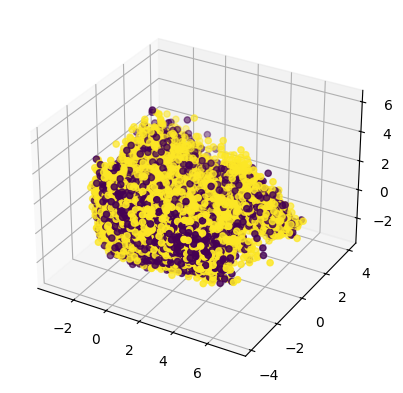

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
fig.show()

(array([33410.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

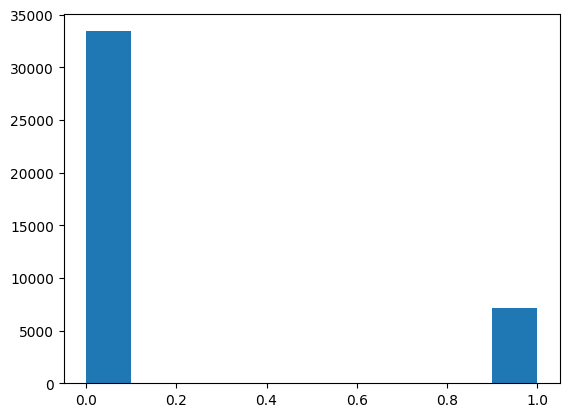

In [19]:
plt.hist(y_pred_pca)

(array([25959.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14601.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

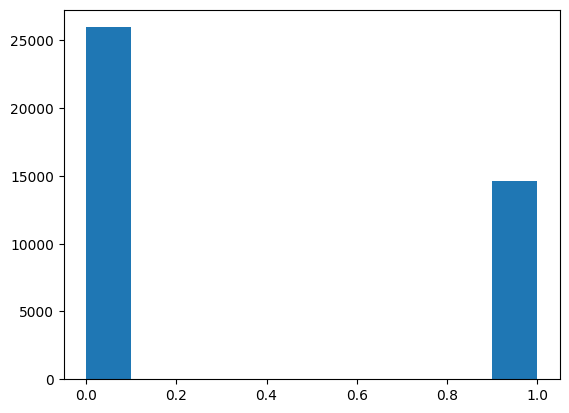

In [20]:
plt.hist(1 - y)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(1 - y, y_pred_pca, target_names=['Major', 'Minor']))

              precision    recall  f1-score   support

       Major       0.64      0.82      0.72     25959
       Minor       0.35      0.17      0.23     14601

    accuracy                           0.59     40560
   macro avg       0.49      0.50      0.47     40560
weighted avg       0.53      0.59      0.54     40560



без пса

In [22]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([ 7245.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 33315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

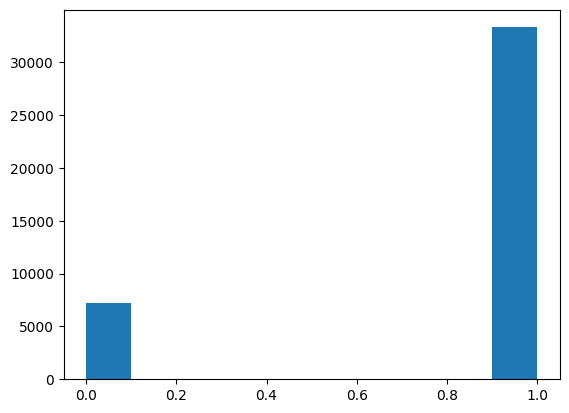

In [23]:
plt.hist(y_pred)

(array([14601.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25959.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

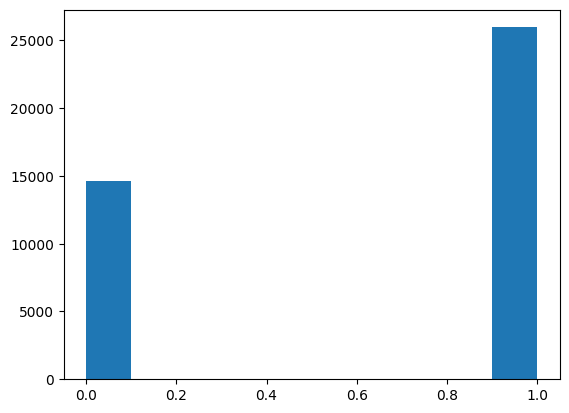

In [24]:
plt.hist(y)

In [25]:
print(classification_report(1 - y, y_pred, target_names=['Major', 'Minor']))

              precision    recall  f1-score   support

       Major       0.65      0.18      0.28     25959
       Minor       0.36      0.83      0.50     14601

    accuracy                           0.41     40560
   macro avg       0.51      0.50      0.39     40560
weighted avg       0.55      0.41      0.36     40560



# DBSCAN

In [69]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.6).fit(X_pca)
y_pred_dbscan = clustering.labels_

C:\Users\sasha\AppData\Local\Temp\ipykernel_2244\3977381269.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


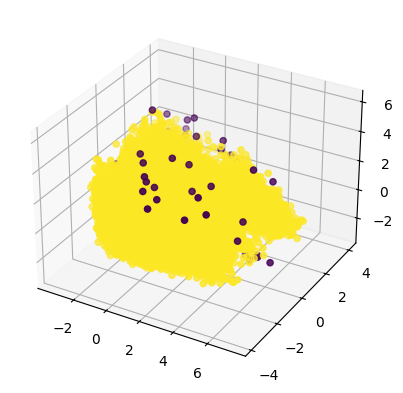

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_dbscan, cmap='viridis')
fig.show()

In [71]:
count = np.unique(y_pred_dbscan)
count

array([-1,  0], dtype=int64)

(array([40516.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    44.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

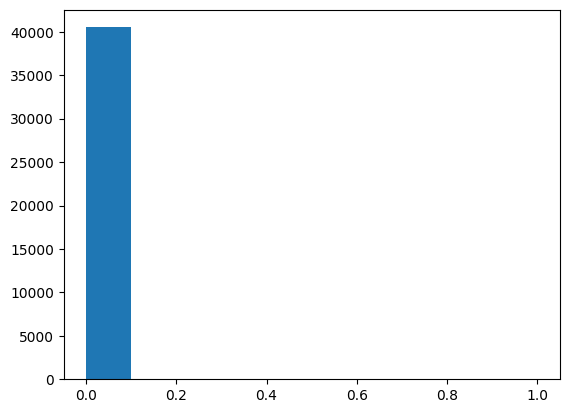

In [73]:
plt.hist(np.absolute(y_pred_dbscan))

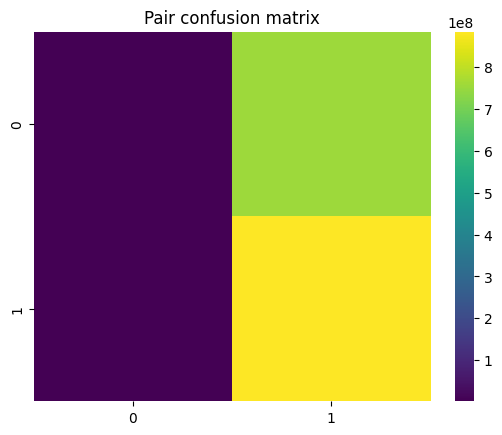

In [76]:
import seaborn as sns
from sklearn.metrics.cluster import pair_confusion_matrix

matrix = pair_confusion_matrix(y, np.absolute(y_pred_dbscan))
sns.heatmap(matrix, cmap="viridis")
plt.title("Pair confusion matrix")
plt.show()

# Иерархическая кластеризация

In [31]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X_pca)
y_hierarchy_pca = clustering.labels_

(array([34877.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5683.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

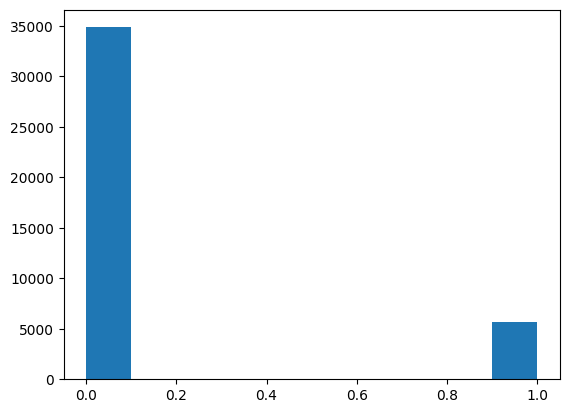

In [32]:
plt.hist(y_hierarchy_pca)

In [33]:
print(classification_report(1 - y, y_hierarchy_pca, target_names=['Major', 'Minor']))

              precision    recall  f1-score   support

       Major       0.64      0.86      0.73     25959
       Minor       0.35      0.14      0.20     14601

    accuracy                           0.60     40560
   macro avg       0.49      0.50      0.46     40560
weighted avg       0.54      0.60      0.54     40560



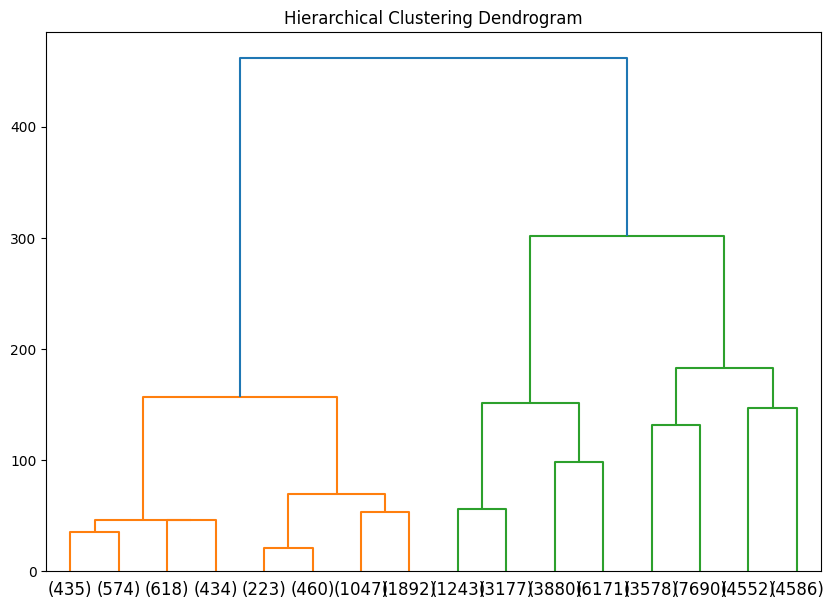

In [34]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'), truncate_mode="level", p=3)


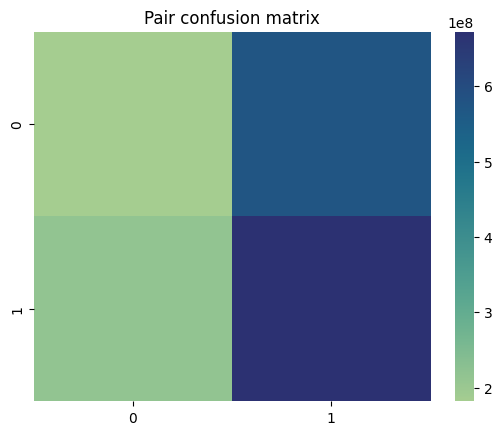

In [35]:
matrix = pair_confusion_matrix(y, y_hierarchy_pca)
sns.heatmap(matrix, cmap="crest")
plt.title("Pair confusion matrix")
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_2244\2386249606.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


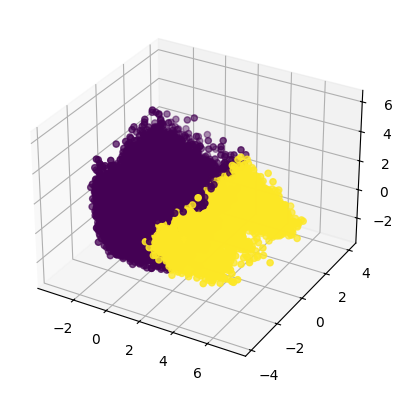

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_hierarchy_pca)
fig.show()

In [79]:
print(classification_report(1-y, y_hierarchy_pca, target_names=['Major', 'Minor']))

              precision    recall  f1-score   support

       Major       0.64      0.86      0.73     25959
       Minor       0.35      0.14      0.20     14601

    accuracy                           0.60     40560
   macro avg       0.49      0.50      0.46     40560
weighted avg       0.54      0.60      0.54     40560

